In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import  RandomForestClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB ,BernoulliNB


warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts() #0 is not frauded and 1 is frauded


0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.duplicated().sum()


1081

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [9]:
#feature scalling to normalize data in range 0:1
stand=MinMaxScaler()
df[['Amount']] = stand.fit_transform(df[['Amount']])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


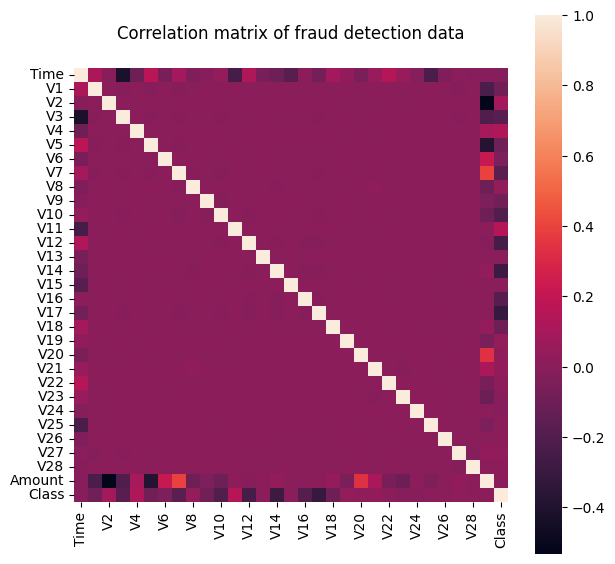

In [10]:
#representing correlation between features
plt.figure(figsize=(7,7))
hm = sns.heatmap(df.corr(), square = True)
hm.set(title = "Correlation matrix of fraud detection data\n")

plt.show()

In [4]:
#As we count of unfrauded is much more than the frauded class so we'll take a sample from the unfrauded class
frauded = df[df.Class == 1]
unfrauded = df[df.Class == 0]

sampleOfUnfrauded = unfrauded.sample(n = 2000)
newdf = pd.concat([sampleOfUnfrauded,frauded],axis = 0)
newdf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101816,67952.0,-0.425025,0.616886,0.503023,-0.949794,-0.751755,-0.718009,-0.163024,0.233222,-1.448136,...,0.094961,0.182438,0.050986,-0.104356,-0.273234,-0.303378,0.093446,0.051556,29.00,0
142481,84745.0,1.290350,0.084382,-0.461346,0.138323,0.562602,0.670675,-0.246944,0.289949,0.147037,...,-0.341536,-1.061896,-0.046886,-1.797668,0.285828,0.219583,-0.023913,-0.003946,1.98,0
271279,164502.0,1.376513,-1.487253,-1.507977,0.353651,-0.565543,-0.406271,0.206142,-0.053501,1.124946,...,0.045935,-0.479074,-0.096116,-0.419776,-0.255615,-0.110970,-0.100906,-0.016969,333.81,0
15799,27241.0,0.513954,-1.532280,0.546889,-0.684101,-0.660383,1.795132,-0.723424,0.723505,1.869998,...,0.148923,0.322347,-0.122400,-1.007108,0.094095,-0.642175,0.115188,0.050203,253.20,0
41677,40781.0,1.059978,0.041244,0.382701,1.250712,-0.311883,-0.366149,0.050150,-0.023937,0.100562,...,0.093891,0.172183,-0.095805,0.051263,0.493764,-0.303730,0.022556,0.030893,69.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [5]:
newdf['Class'].value_counts() #It seems good we'll use this new dataframe to apply models on it


0    2000
1     492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Amount', ylabel='Class'>

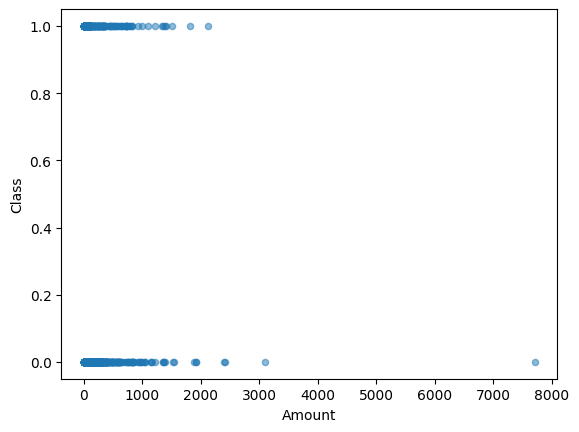

In [6]:
newdf.plot.scatter(x = "Amount", y = "Class", alpha = 0.5)

<AxesSubplot:>

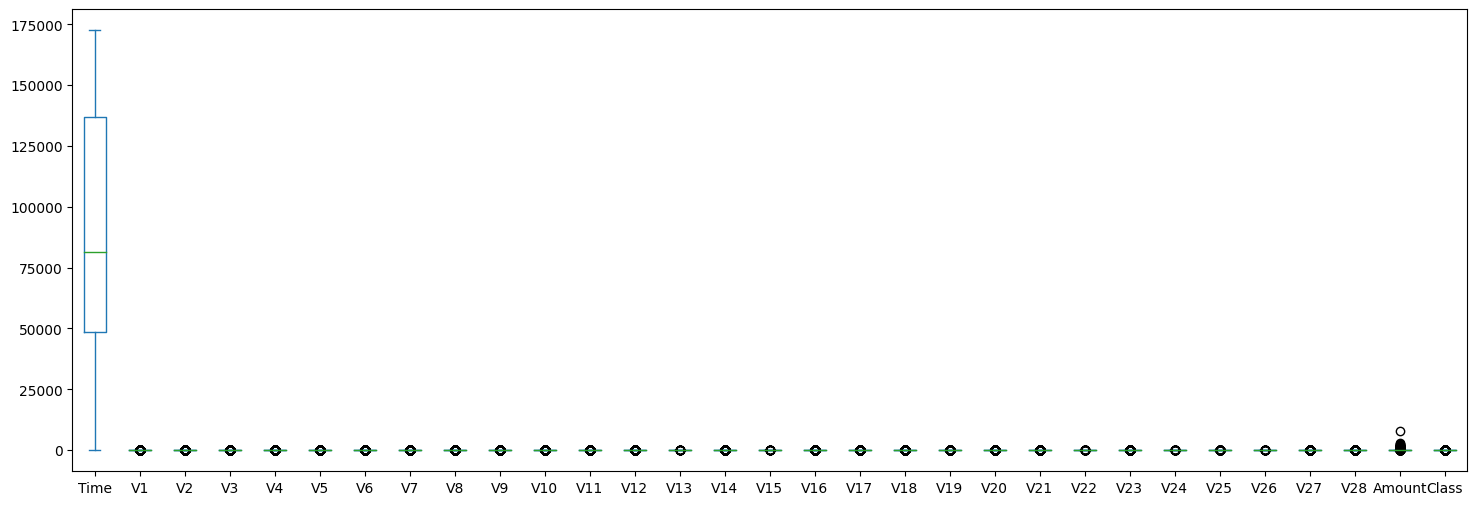

In [7]:
newdf.plot.box(figsize=(18,6))


In [8]:
X = newdf.iloc[:,:-1]
Y = newdf.iloc[:,-1]
#splliting data to train and test with 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, shuffle=True, random_state=10)

In [9]:
#A list to save accuracy score for each model
scores=[]

In [10]:
#random forest
classifier = RandomForestClassifier(n_estimators = 100)
#train the model
classifier.fit(X_train, y_train)
#predict with the test data
y_pred = classifier.predict(X_test)

print("random forest accuracy:",accuracy_score(y_test,y_pred))
print("random forest precision ",metrics.precision_score(y_test,y_pred))
print("random forest recall ",metrics.recall_score(y_test,y_pred))

#adding accuracy for the model in scores list
scores.append({
        'model': 'Random forest',
        'accuracy':accuracy_score(y_test,y_pred)})



random forest accuracy: 0.9695024077046549
random forest precision  0.9705882352941176
random forest recall  0.8608695652173913


In [11]:
#desicion tree 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("desicion tree accuracy:",accuracy_score(y_test,predictions))
print("desicion tree precision: ",metrics.precision_score(y_test,predictions))
print("desicion tree recall: ",metrics.recall_score(y_test,predictions))

scores.append({
        'model': 'Decision tree',
        'accuracy':accuracy_score(y_test,predictions) })



desicion tree accuracy: 0.9502407704654896
desicion tree precision:  0.8387096774193549
desicion tree recall:  0.9043478260869565


In [12]:
#logistic regression
log = LogisticRegression()
pred = log.fit(X_train,y_train).predict(X_test)

print("logistic regression accuracy: ",accuracy_score(y_test,pred))
print("logistic regression precision ",metrics.precision_score(y_test,pred))
print("logistic regression recall ",metrics.recall_score(y_test,pred))

scores.append({
        'model': 'logistic regression',
        'accuracy':accuracy_score(y_test,pred) })

logistic regression accuracy:  0.9678972712680578
logistic regression precision  0.9439252336448598
logistic regression recall  0.8782608695652174


In [13]:
#SVM
#we use grid search to choose the best parameters 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}

grid_SVM = GridSearchCV(SVC(), param_grid)
grid_SVM.fit(X_train, y_train)
pred=grid_SVM.predict(X_test)

print("SVM accuracy: ", accuracy_score(y_test, pred))
print("SVM precision ",metrics.precision_score(y_test,pred))
print("SVM recall ",metrics.recall_score(y_test,pred))
print("best parameters: ",grid_SVM.best_params_)

scores.append({
        'model': 'SVM',
        'accuracy':accuracy_score(y_test,pred) })

SVM accuracy:  0.8426966292134831
SVM precision  0.7428571428571429
SVM recall  0.22608695652173913
best parameters:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [14]:
#GaussianNB
GNB = GaussianNB()
pred = GNB.fit(X_train,y_train).predict(X_test)

print("GaussianNB accuracy: ",accuracy_score(y_test,pred))
print("GaussianNB precision ",metrics.precision_score(y_test,pred))
print("GaussianNB recall ",metrics.recall_score(y_test,pred))
scores.append({
        'model': 'GaussianNB',
        'accuracy':accuracy_score(y_test,pred) })

GaussianNB accuracy:  0.9470304975922953
GaussianNB precision  0.9659090909090909
GaussianNB recall  0.7391304347826086


In [15]:
#BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train,y_train)
pred = BNB.predict(X_test)

print("BernoulliNB accuracy: ",accuracy_score(y_test,pred))
print("BernoulliNB precision ",metrics.precision_score(y_test,pred))
print("BernoulliNB recall ",metrics.recall_score(y_test,pred))
scores.append({
        'model': 'BernoulliNB',
        'accuracy':accuracy_score(y_test,pred) })

BernoulliNB accuracy:  0.9582664526484751
BernoulliNB precision  0.978494623655914
BernoulliNB recall  0.7913043478260869


In [16]:
#Adaboost
ada=AdaBoostClassifier()
ada_prams={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
ada_grid=GridSearchCV(ada,ada_prams,n_jobs=-1)

ada_grid.fit(X_train, y_train)
pred=ada_grid.predict(X_test)

print("Adaboost accuracy: ",accuracy_score(y_test,pred))
print("Adaboost precision ",metrics.precision_score(y_test,pred))
print("Adaboost recall ",metrics.recall_score(y_test,pred))
scores.append({
        'model': 'Adaboost',
        'accuracy':accuracy_score(y_test,pred) })

Adaboost accuracy:  0.9727126805778491
Adaboost precision  0.9622641509433962
Adaboost recall  0.8869565217391304


In [26]:
ada_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [17]:
#printing accuracy for each model 
df_score = pd.DataFrame(scores,columns=['model','accuracy'])
df_score

,model,accuracy
0,Random forest,0.969502
1,Decision tree,0.950241
2,logistic regression,0.967897
3,SVM,0.842697
4,GaussianNB,0.947030
5,BernoulliNB,0.958266
6,Adaboost,0.972713


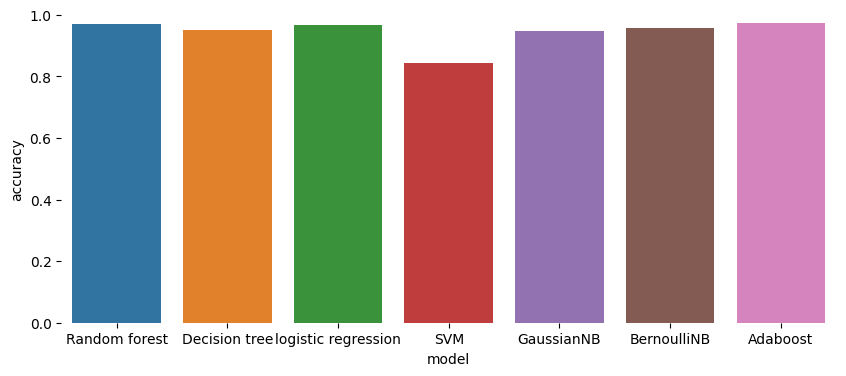

In [18]:
#visualization for each model's accuracy
plt.figure(figsize=(10,4))
sns.barplot(x="model", y="accuracy", data=df_score)
plt.ylim(0, 1)
sns.despine(left=True, bottom=True)

#conclusion: Adaboost is the highest accuracy and SVM is the lowest

In [19]:
#classification report AdaBoost
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       508
           1       0.96      0.89      0.92       115

    accuracy                           0.97       623
   macro avg       0.97      0.94      0.95       623
weighted avg       0.97      0.97      0.97       623



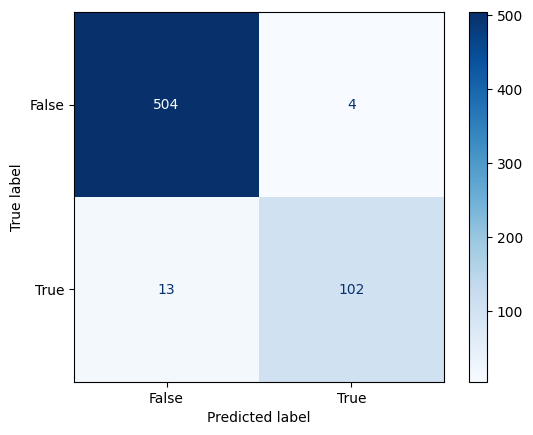

In [25]:
confusionMatrix = metrics.confusion_matrix(y_test, pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
cm.plot(cmap="Blues")

plt.show()